In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('/Users/jipyeongseon/Desktop/대학원/working.csv')

print(df.head())
print(df.shape)
print(df.info())

         나이        신장        체중  Min_nrs_pod0  Max_nrs_pod0  Avg_nrs_pod0  \
0  0.727273  0.816220  0.203497           0.2           0.8          0.50   
1  0.806818  0.816220  0.169930           0.3           0.2          0.25   
2  0.443182  0.825149  0.132867           0.3           0.7          0.50   
3  0.420455  0.784970  0.259441           0.2           0.4          0.30   
4  0.397727  0.843006  0.250350           0.2           0.7          0.45   

   9_TOTAL_VOL_CUM (mL)  12_TOTAL_VOL_CUM (mL)  24_TOTAL_VOL_CUM (mL)  \
0              0.357496               0.292593               0.220370   
1              0.197694               0.185185               0.129630   
2              0.069193               0.064198               0.032099   
3              0.093904               0.070370               0.035185   
4              0.182867               0.137037               0.072840   

   48_TOTAL_VOL_CUM (mL)  PONV0   성별  수술과  
0                 0.2428    0.0    M   GS  
1         

In [10]:
print(df['Min_nrs_pod0'].value_counts())
print(df['Max_nrs_pod0'].value_counts())
print(df['Avg_nrs_pod0'].value_counts())
print(df['PONV0'].value_counts())

Min_nrs_pod0
0.2    289
0.3    256
0.4    189
0.5    145
0.1    121
0.0     99
0.7     54
0.6     45
0.8     15
0.9      5
1.0      3
Name: count, dtype: int64
Max_nrs_pod0
0.5    198
0.8    150
0.7    150
0.3    150
0.6    134
0.4    122
0.9    100
1.0     98
0.0     60
0.2     44
0.1     15
Name: count, dtype: int64
Avg_nrs_pod0
0.35    123
0.25    121
0.45    116
0.50    106
0.60     93
0.55     93
0.40     88
0.65     79
0.30     67
0.00     59
0.70     54
0.75     52
0.20     49
0.15     37
0.80     28
0.85     15
0.05     13
0.10     10
0.90     10
0.95      5
1.00      3
Name: count, dtype: int64
PONV0
0.0    1045
1.0     130
Name: count, dtype: int64


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import sys
reload(sys)
sys.setdefaultencoding('utf-8')

# 한글 폰트 설정 (Mac에서 사용하는 경우, 'AppleGothic' 또는 다른 폰트를 사용)
plt.rc('font', family='AppleGothic')  # Windows는 'Malgun Gothic' 또는 'NanumGothic' 사용 가능
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
df = pd.read_csv('/Users/jipyeongseon/Desktop/대학원/working.csv')

# 결측값 제거
df = df.dropna(subset=['PONV0'])

# 1. NRS 분포 시각화 (PONV 그룹별)
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0'], 1):
    plt.subplot(1, 3, i)
    for label in df['PONV0'].unique():
        subset = df[df['PONV0'] == label]
        sns.distplot(subset[col], kde=True, hist=True, label=u'PONV={}'.format(label))
    plt.title(u'{} 분포 (PONV=0/1)'.format(col))
    plt.legend()
plt.tight_layout()
plt.show()

# 2. 상관 행렬 및 히트맵 시각화
plt.figure(figsize=(10, 8))
#correlation_matrix = df[['Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0', '나이', '신장', '체중', 'PONV0']].corr()
correlation_matrix = df[['Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0', '나이', '신장', '체중', 'PONV0']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title(u"상관 행렬 히트맵")
plt.show()

# 3. PONV 여부에 따른 NRS 값 박스 플롯
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='PONV0', y=col, data=df, palette='Set2')
    plt.title(u'PONV 여부에 따른 {} 분포'.format(col))
plt.tight_layout()
plt.show()


NameError: name 'reload' is not defined

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 데이터 불러오기
df = pd.read_csv('/Users/jipyeongseon/Desktop/대학원/working.csv')

# 타겟 열(PONV0)에 결측값이 있는 행 제거
df = df.dropna(subset=['PONV0'])

# 나머지 결측값 처리 (연속형 데이터에는 중앙값 사용)
imputer = SimpleImputer(strategy='median')
df[['나이', '신장', '체중', 'Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0']] = imputer.fit_transform(
    df[['나이', '신장', '체중', 'Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0']]
)

# 범주형 변수 인코딩 (성별, 수술과)
df = pd.get_dummies(df, columns=['성별', '수술과'], drop_first=True)

# 특징(X)과 레이블(y) 선택
#X = df[['Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0', '나이', '신장', '체중']]
X = df[['Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0']]
y = df['PONV0']

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특징 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 모델 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8638297872340426
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       202
         1.0       1.00      0.03      0.06        33

    accuracy                           0.86       235
   macro avg       0.93      0.52      0.49       235
weighted avg       0.88      0.86      0.80       235



In [10]:
# 클래스 가중치를 균형 있게 설정하여 재훈련
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 재평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8553191489361702
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       202
         1.0       0.00      0.00      0.00        33

    accuracy                           0.86       235
   macro avg       0.43      0.50      0.46       235
weighted avg       0.74      0.86      0.79       235



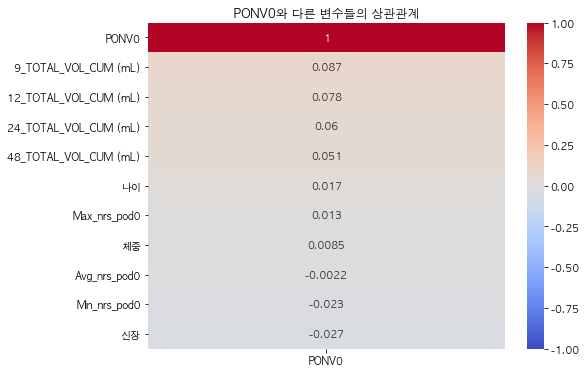

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Mac의 경우 'AppleGothic' 사용)
plt.rc('font', family='AppleGothic')  # 한글 폰트를 AppleGothic으로 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
df = pd.read_csv('/Users/jipyeongseon/Desktop/대학원/working.csv', encoding='utf-8')

# PONV0와 다른 변수들 간 상관 관계 분석 및 시각화
df = df.dropna(subset=['PONV0'])  # PONV0 결측값 제거
correlation_matrix = df.corr()

# PONV0와 다른 변수들 간 상관 관계를 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['PONV0']].sort_values(by='PONV0', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(u"PONV0와 다른 변수들의 상관관계")
plt.show()


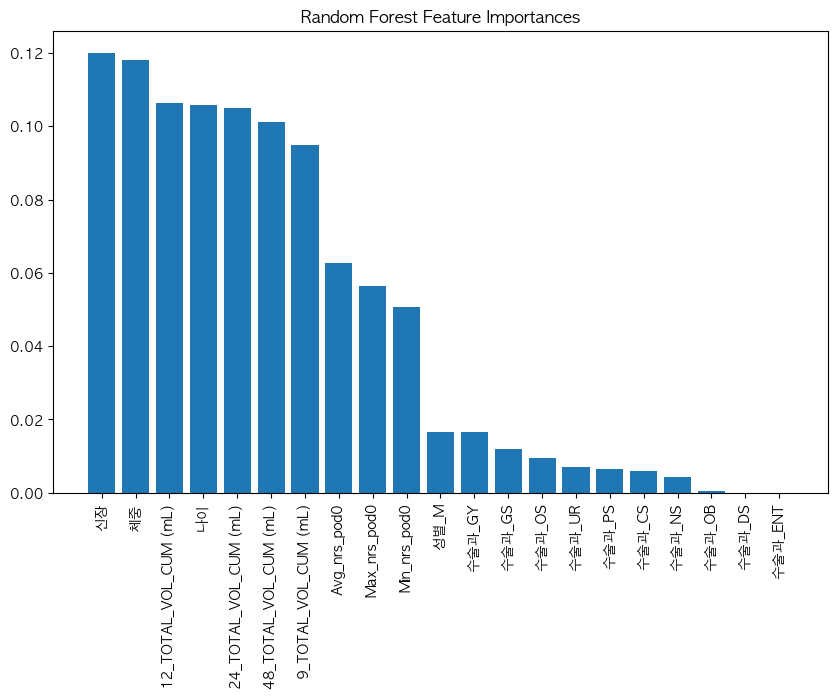

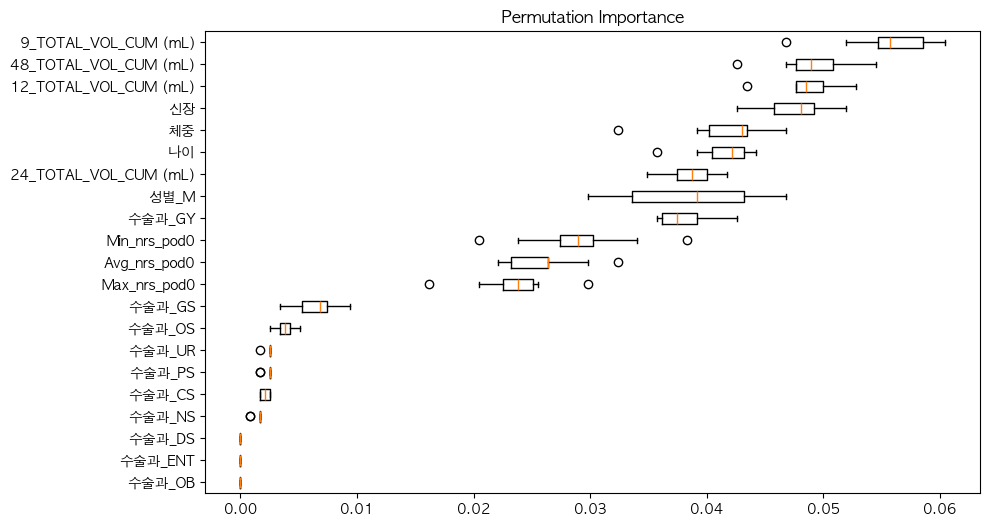

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Mac에서는 'AppleGothic' 사용)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 불러오기 및 전처리
df = pd.read_csv('/Users/jipyeongseon/Desktop/대학원/working.csv', encoding='utf-8')
# 'PONV0' 열의 결측값 제거
df = df.dropna(subset=['PONV0'])

# 숫자형 열에 대해 중앙값으로 결측값을 채우기
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# 범주형 변수 인코딩
df = pd.get_dummies(df, columns=['성별', '수술과'], drop_first=True)

# 숫자형 열에 대해 중앙값으로 결측값을 채우기
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# 특징(X)과 레이블(y) 선택
X = df.drop('PONV0', axis=1)
y = df['PONV0']

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 변수 중요도 시각화 (랜덤 포레스트 자체 중요도)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# 순열 중요도 계산
result = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# 순열 중요도 시각화
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.title("Permutation Importance")
plt.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
plt.show()



/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing f

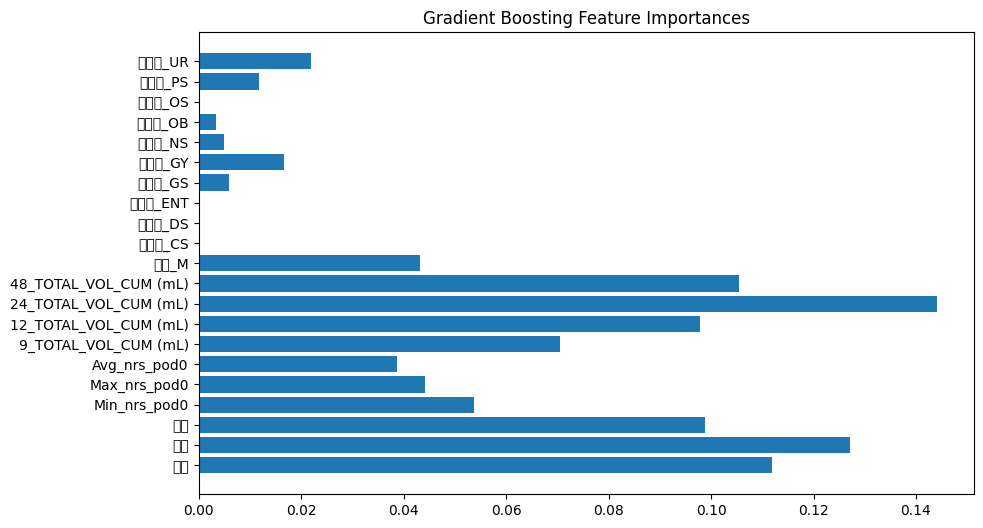

/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing f

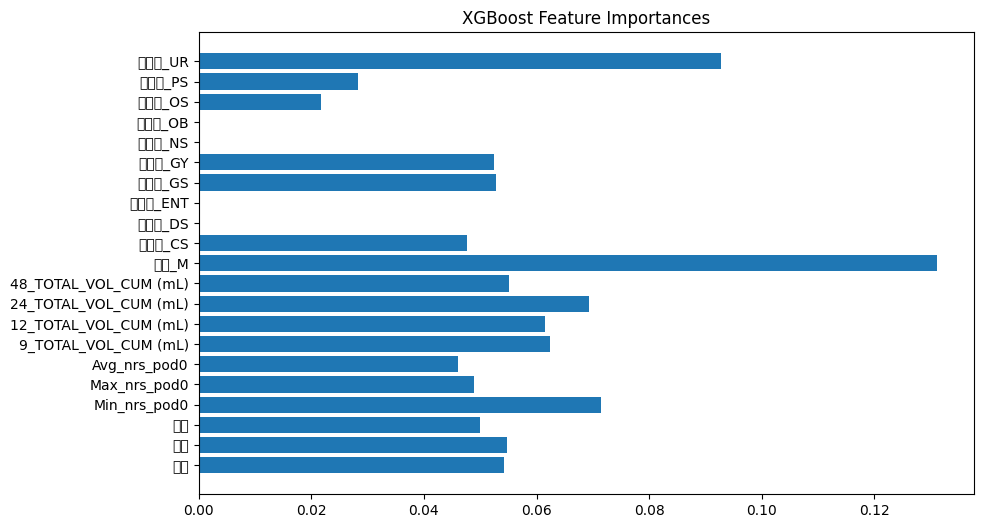

Found a NULL input array in _cext_dense_tree_update_weights!


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

# 데이터 불러오기 및 전처리
df = pd.read_csv('/Users/jipyeongseon/Desktop/대학원/working.csv', encoding='utf-8')
df = df.dropna(subset=['PONV0'])

# 숫자형 열에 대해 중앙값으로 결측값 채우기
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# 범주형 변수 인코딩
df = pd.get_dummies(df, columns=['성별', '수술과'], drop_first=True)

# 특징(X)과 레이블(y) 선택
X = df.drop('PONV0', axis=1)
y = df['PONV0']

# Gradient Boosting 모델 학습 및 중요도 시각화
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X, y)
gb_importances = gb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Feature Importances")
plt.barh(X.columns, gb_importances, align="center")
plt.show()

# XGBoost 모델 학습 및 중요도 시각화
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X, y)
xgb_importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.barh(X.columns, xgb_importances, align="center")
plt.show()

# SHAP 분석
explainer = shap.Explainer(xgb_model, X)
shap_values = explainer(X)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X, plot_type="bar")

# SHAP Dependence Plot for a specific feature (예: 'Avg_nrs_pod0')
plt.figure(figsize=(10, 6))
shap.dependence_plot("Avg_nrs_pod0", shap_values.values, X)
